In [1]:
import lhapdf
#import ROOT
import math
import pandas as pd
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq18 = lhapdf.mkPDF("CT18qed",0)
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_PDF = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo", 0)
#JAM21_PDF = lhapdf.mkPDF("JAM21PionPDFnlo", 0)

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/CT18qed/CT18qed_0000.dat
CT18qed PDF set, member #0, version 1
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_PDF_proton_nlo/JAM20-SIDIS_PDF_proton_nlo_0000.dat
JAM20-SIDIS_PDF_proton_nlo PDF set, member #0, version 2


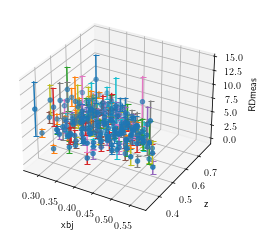

In [2]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
df = pd.read_csv("results/csv_datasub.csv")
#df = df[df['Wp2_corr']>2.8]
xs = df[df['Q2']==4]['xbj_corr']
zs = df[df['Q2']==4]['z_corr']
RDs = df[df['Q2']==4]['y_RD']
RD_err = df[df['Q2']==4]['error_RD']
#ax.errorbar(xs,zs,RDs,RD_err,marker = "_")
for i in range(0,len(xs)):
    xbj_corr = xs[i]
    z_corr = zs[i]
    RD = RDs[i]
    RD_error = RD_err[i]
    ax.plot([xbj_corr,xbj_corr],[z_corr,z_corr],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
#plt.savefig("RD_xbj_z")

In [3]:
#df[df['Q2'] == 4.75].head()
df.describe()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp,Kpi_pos,Kpi_neg
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,...,669.000000,669.000000,669.000000,669.000000,648.000000,648.000000,669.000000,669.000000,669.000000,669.000000
mean,4.672646,4.373268,0.013097,0.490135,0.437780,0.438307,0.000082,0.525561,0.519694,0.519331,...,15.743969,13.970442,6.570968,3.425618,0.417630,0.496490,2.802804,3.818784,0.034049,0.008699
std,0.598850,0.705502,0.007230,0.079950,0.081557,0.077097,0.000025,0.099271,0.097757,0.094371,...,15.162535,13.727896,1.175854,0.683841,0.069390,0.094642,0.665042,10.046096,0.027758,0.003474
min,4.000000,3.071820,0.001455,0.350000,0.275000,0.278334,0.000015,0.400000,0.325000,0.334010,...,0.129674,0.091803,4.137650,2.653050,0.272838,0.173809,1.569750,-9.276510,-0.023014,0.001036
25%,4.000000,3.844920,0.007497,0.450000,0.375000,0.377435,0.000071,0.400000,0.425000,0.438250,...,4.967270,4.311320,5.690370,2.860980,0.363663,0.421944,2.293280,-5.688030,0.014553,0.006406
50%,4.750000,4.423850,0.012334,0.500000,0.425000,0.428280,0.000094,0.500000,0.525000,0.523105,...,10.511400,9.055280,6.460460,3.250610,0.412708,0.499513,2.727890,1.427700,0.026492,0.008154
75%,5.500000,4.880570,0.017952,0.550000,0.475000,0.480547,0.000100,0.600000,0.575000,0.578402,...,21.666200,19.058900,7.421790,3.797850,0.458364,0.559507,3.263770,12.336900,0.049521,0.010518
max,5.500000,6.370610,0.038011,0.650000,0.625000,0.618508,0.000111,0.700000,0.775000,0.767713,...,82.799100,80.478600,9.626200,6.523390,0.585097,0.752672,4.910320,23.784100,0.121560,0.017965


In [4]:
#CSVS_results = []
pdf_sets = []
i_FF = 2
FF_model = ["fDSSLO","fDSSNLO","JAM20","hknsff07_LO","hknsff07_NLO"]
i_PDF = 1
PDF_model = ["cteq6l1","JAM20","cteq18qed"]
i_assumption = '7ass_rho'

In [5]:
#here the third and fourth inits are switched
#inits=(0,0)
#three input
#inits = (1,-1,1)
#inits = (0.31621375387783907,0.9655536623222454,2.2,1.4)
#inits = (0.31621375387783907,0.9655536623222454,4,0.2)
inits = (0.31621375387783907,0.9655536623222454,1.8,-0.2,-1)
#inits = (0.31621375387783907,1.0602531294347466,0.60029420012617,0.5690151479308769)
#four input
#4
#inits=(0.5837438039662431,-1.1844700435399933,1.6742194710533476,0)
#4.75
#inits=(0.5487693365000776,-1.0881946339773718,1.594995464377801,0)
#5.5
#inits=(0.38322380904636766,-0.47844410509432217,1.115729075281362,0)
y_RD = 'y_RD'
#rho_file = open("rho_sub_kai2.txt","a")
#rho_file.write("\n")
#rho_file.write(str(a_rho))
#rho_file.write(" ")

In [6]:
def Get_weighted(values,errs):
    sums = 0
    sig = 0
    for i in range(len(values)):
        for j in range(len(errs)):
            sums+=values[i]/(errs[i]*errs[i])
            sig+=1/(errs[i]*errs[i])
    return sums/sig   
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    for i in range(len(value)):
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma
def Get_weighted_sigma(value,error):
    sum_sigma = 0
    for i in range(len(value)):
        sum_sigma += 1/(error[i]*error[i])
    return math.sqrt(1/sum_sigma)




In [7]:
from iminuit import Minuit
import scipy.integrate as integrate
import scipy.special as sc
import sys
sys.path.insert(1,'DSS')
import fDSS_
sys.path.insert(1,'hkns07fflib-v1_2')
import hknsff07_
def Deltaz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return delta_z
def Dz_param(z_had,alpha,beta):
    delta_z = z_had**alpha*(1-z_had)**beta
    return (1-delta_z)/(1+delta_z)
    #return params[0]+params[1]*z_had+params[2]*z_had**2+params[3]*z_had**3
def CSVx_param(xbj,a,b):
    #a = -0.5 
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
    #return params[len(params)-1]
def Bxz_param(Q,z_had,xbj,i_pdf,i_ff):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    if i_ff==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus 
    elif i_ff==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_ff==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
    elif i_ff==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_ff==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_pdf == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_pdf == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_pdf == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def Ax_param(Q,xbj,i_pdf):
    uv = 0
    dv = 0
    if i_pdf == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_pdf == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_pdf ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,a):
    neg_yield = neg_D2_yield+a*neg_rho_yield
    pos_yield = pos_D2_yield+a*pos_rho_yield
    RY = neg_D2_yield/pos_D2_yield
    RY_rho = neg_yield/pos_yield
    RD = (4*RY-1)/(1-RY)
    RD_rho = (4*RY_rho-1)/(1-RY_rho)
    return RD-RD_rho
def RDmeas_CSV(Q,z_had,xbj,neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,alpha,beta,a,b,gamma,i_pdf,i_ff):
    
    Dz = Dz_param(z_had,alpha,beta)
    CSVx = CSVx_param(xbj,a,b)
    
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    dRD_rho = dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,gamma)
    return (Bx-Ax*CSVx)/Dz-2.5+dRD_rho
def RDmeas_CSV_norho(Q,z_had,xbj,neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,alpha,beta,a,b,gamma,i_pdf,i_ff):
    
    Dz = Dz_param(z_had,alpha,beta)
    CSVx = CSVx_param(xbj,a,b)
    
    Bx = Bxz_param(Q,z_had,xbj,i_pdf,i_ff)
    Ax = Ax_param(Q,xbj,i_pdf)
    return (Bx-Ax*CSVx)/Dz-2.5

In [8]:
df = df[df['shms_dp']>-9.5]
df = df[df['shms_dp']<24.5]
df.describe()

,Q2,Q2_corr,Q2_corr_err,xbj_set,xbj,xbj_corr,xbj_corr_err,z_set,z,z_corr,...,yield_pos_incnorad,yield_pos_incrad,W2_corr,Wp2_corr,xprime_corr,zprime_corr,shms_p,shms_dp,Kpi_pos,Kpi_neg
count,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,669.000000,...,669.000000,669.000000,669.000000,669.000000,648.000000,648.000000,669.000000,669.000000,669.000000,669.000000
mean,4.672646,4.373268,0.013097,0.490135,0.437780,0.438307,0.000082,0.525561,0.519694,0.519331,...,15.743969,13.970442,6.570968,3.425618,0.417630,0.496490,2.802804,3.818784,0.034049,0.008699
std,0.598850,0.705502,0.007230,0.079950,0.081557,0.077097,0.000025,0.099271,0.097757,0.094371,...,15.162535,13.727896,1.175854,0.683841,0.069390,0.094642,0.665042,10.046096,0.027758,0.003474
min,4.000000,3.071820,0.001455,0.350000,0.275000,0.278334,0.000015,0.400000,0.325000,0.334010,...,0.129674,0.091803,4.137650,2.653050,0.272838,0.173809,1.569750,-9.276510,-0.023014,0.001036
25%,4.000000,3.844920,0.007497,0.450000,0.375000,0.377435,0.000071,0.400000,0.425000,0.438250,...,4.967270,4.311320,5.690370,2.860980,0.363663,0.421944,2.293280,-5.688030,0.014553,0.006406
50%,4.750000,4.423850,0.012334,0.500000,0.425000,0.428280,0.000094,0.500000,0.525000,0.523105,...,10.511400,9.055280,6.460460,3.250610,0.412708,0.499513,2.727890,1.427700,0.026492,0.008154
75%,5.500000,4.880570,0.017952,0.550000,0.475000,0.480547,0.000100,0.600000,0.575000,0.578402,...,21.666200,19.058900,7.421790,3.797850,0.458364,0.559507,3.263770,12.336900,0.049521,0.010518
max,5.500000,6.370610,0.038011,0.650000,0.625000,0.618508,0.000111,0.700000,0.775000,0.767713,...,82.799100,80.478600,9.626200,6.523390,0.585097,0.752672,4.910320,23.784100,0.121560,0.017965


In [9]:
Qs = []
parameters = []
param_errs = []
kaisquare = []

def least_squares_Q2(alpha,beta,a,b,gamma):
    least_square = 0
    for i,row in df.iterrows():
        Q2corr = row['Q2_corr']
        xbj = row['xbj_corr']
        zhad = row['z_corr']
        RD = row[y_RD]
        RD_err = row['error_RD']
        neg_D2_yield = row['yield_neg']
        pos_D2_yield = row['yield_pos']
        neg_D2_rho = row['yield_neg_rho']*row['radia_corr_neg']
        pos_D2_rho = row['yield_pos_rho']*row['radia_corr_pos']
       
        Qcorr = math.sqrt(Q2corr)
        least_square+=((RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,pos_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF)))**2/(RD_err)**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,alpha = inits[0],beta = inits[1],a = inits[2],b = inits[3],gamma = inits[4])
m_Q2.limits['gamma'] = (-1.5,-0.5)
#m_Q2.fixed['gamma'] = True
#m_Q2.limits['a'] = (0,3)
#m_Q2.limits['b'] = (-0.5,0.5)
m_Q2.errordef = Minuit.LEAST_SQUARES
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
params = m_Q2.values
parameters.append(m_Q2.values)
param_errs.append(m_Q2.errors)
#print(m_Q2.values["a"])
print(len(df)) 
#print(m_Q2.values)
#print(m_Q2.errors)
print(m_Q2.fval)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(df) - m_Q2.nfit}",
]
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
print(fit_info)

a_rho = m_Q2.values["gamma"]
print(a_rho)

dfrhoallout = pd.DataFrame()
for i,row in df.iterrows():
    Q2corr = row['Q2_corr']
    xbj = row['xbj_corr']
    zhad = row['z_corr']
    
    RD_err = row['error_RD']
    neg_D2_yield = row['yield_neg']
    pos_D2_yield = row['yield_pos']
    neg_D2_rho = row['yield_neg_rho']*row['radia_corr_neg']
    pos_D2_rho = row['yield_pos_rho']*row['radia_corr_pos']
    RD = row['y_RD']#+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_D2_rho,pos_D2_rho,a_rho)
    
    Qcorr = math.sqrt(Q2corr)
    residual = (RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,pos_D2_rho,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],m_Q2.values[4],i_PDF,i_FF))/RD_err
    #(RD-RDmeas_CSV(Qcorr,zhad,xbj,neg_D2_yield,pos_D2_yield,neg_D2_rho,alpha,beta,a,b,gamma,i_PDF,i_FF))/RD_err
    #print(residual)
    row['Residual_Arho']=(residual)
    dfrhoallout = dfrhoallout.append(row)


dfrhoallout.to_csv('results/csv_rho_all_out.csv',index = False)


0.20913119336767483 1.3307868041697344 2.4156916046899 0.03807550139596034 -1.4999999505384767
669
813.127384294237
['$\\chi^2$ / $n_\\mathrm{dof}$ = 813.1 / 664', 'alpha = $0.209 \\pm 0.018$', 'beta = $1.331 \\pm 0.059$', 'a = $2.416 \\pm 0.338$', 'b = $0.038 \\pm 0.425$', 'gamma = $-1.500 \\pm 0.013$']
-1.4999999505384767


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoallout.append(row)
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/76854722.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfrhoallout = dfrhoall

In [10]:
print(dfrhoallout[dfrhoallout['Residual_Arho']<-5])

Empty DataFrame
Columns: [Q2, Q2_corr, Q2_corr_err, xbj_set, xbj, xbj_corr, xbj_corr_err, z_set, z, z_corr, z_corr_err, RunGroup, y_RD, error_RD, y_RD_rho, y_RD_1p5rho, y_RD_1p8rho, y_RD_2rho, RY, RY_rho, RY_1p8rho, RY_noexc, RY_nodelta, error, yield_neg, yield_pos, radia_corr_neg, radia_corr_pos, yield_neg_data, yield_neg_D2_data, error_neg, yield_pos_data, yield_pos_D2_data, error_pos, charge_neg_all, charge_pos_all, yield_neg_exc, yield_neg_delta, yield_neg_norho, yield_neg_rho, yield_pos_exc, yield_pos_delta, yield_pos_norho, yield_pos_rho, yield_neg_incnorad, yield_neg_incrad, yield_pos_incnorad, yield_pos_incrad, W2_corr, Wp2_corr, xprime_corr, zprime_corr, shms_p, shms_dp, Kpi_pos, Kpi_neg, Residual_Arho]
Index: []

[0 rows x 57 columns]


In [11]:
import json
with open('results/CSVs_2dfit.json') as CSV2d_infile:
    j_CSV2d_out=json.load(CSV2d_infile)
name = i_assumption+'all_param'
param_len = len(parameters[0])
print(param_len)
parametersall = []
for i in range(param_len):
    
    parametersall.append(parameters[0][i])
print(parametersall)

j_CSV2d_out[name] = {'Dzparam':parametersall}
with open('results/CSVs_2dfit.json','w') as CSV2d_outfile:
    json.dump(j_CSV2d_out,CSV2d_outfile,indent = 4)

5
[0.20913119336767483, 1.3307868041697344, 2.4156916046899, 0.03807550139596034, -1.4999999505384767]


In [12]:
print(m_Q2.covariance)
print(m_Q2.values)

┌───────┬───────────────────────────────────────────────────┐
│       │     alpha      beta         a         b     gamma │
├───────┼───────────────────────────────────────────────────┤
│ alpha │  0.000341 -0.000301 -0.000758 -0.000224  5.26e-10 │
│  beta │ -0.000301   0.00348   0.00672   -0.0232 -1.35e-09 │
│     a │ -0.000758   0.00672     0.114   -0.0679  3.35e-09 │
│     b │ -0.000224   -0.0232   -0.0679     0.181  9.33e-12 │
│ gamma │  5.26e-10 -1.35e-09  3.35e-09  9.33e-12  2.59e-09 │
└───────┴───────────────────────────────────────────────────┘
<ValueView alpha=0.20913119336767483 beta=1.3307868041697344 a=2.4156916046899 b=0.03807550139596034 gamma=-1.4999999505384767>


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/3190978461.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_ones_center = df[df['Q2']==4][df['xbj']==xi].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/3190978461.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4][df['xbj']==xi][df['z']==zi].iterrows():


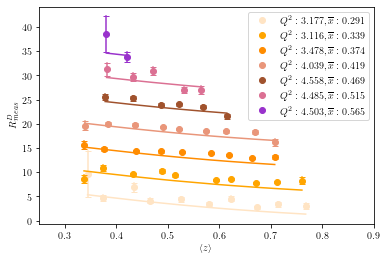

In [13]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
xbj_ones_center = df[df['Q2']==4]['xbj'].unique()
RD_offset = 0
for xi in xbj_ones_center:
    #print(xi)
    
    z_corrs = []
    RD_alls = []
    xbj_corr_xbj = []
    xbj_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    zs_ones_center = df[df['Q2']==4][df['xbj']==xi].sort_values('z')['z'].unique()
    for zi in zs_ones_center:
        #print(zi)
        #print(xi,zi)
        RDs = []
        RDs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4][df['xbj']==xi][df['z']==zi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RDi=float(row['y_RD'])+RD_offset
            RDi_error = float(row['error_RD'])
            neg_D2_yield = row['yield_neg']
            pos_D2_yield = row['yield_pos']
            neg_rho_yield = row['yield_neg_rho']*row['radia_corr_neg']
            pos_rho_yield = row['yield_pos_rho']*row['radia_corr_pos']
            #print(neg_D2_yield,pos_D2_yield,neg_rho_yield)
            #RDi = RDi+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,m_Q2.values[4])
            RDs.append(RDi)
            RDs_error.append(RDi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        RD_alls.append(RD)
        plt.plot([z_corr,z_corr],[RD+RD_err,RD-RD_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    xbj_corr = Get_weighted_average(xbj_corr_xbj,xbj_err_xbj)
    plt.plot(z_corrs,RD_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{x}} :{xbj_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RDmeass = []
    for zhad in z_corrs:
        RDmeasi_fit = RDmeas_CSV_norho(math.sqrt(Q2_corr),zhad,xbj_corr,1,1,1,1,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],0,i_PDF,i_FF)
        RDmeass.append(RDmeasi_fit+RD_offset)
    plt.plot(z_corrs,RDmeass,color = colors_all[i_color])
    RD_offset = RD_offset+5
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$R^D_{meas}$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RDxz_z_1st.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/1523263064.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_ones_center = df[df['Q2']==4.75][df['xbj']==xi].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/1523263064.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4.75][df['xbj']==xi][df['z']==zi].iterrows():


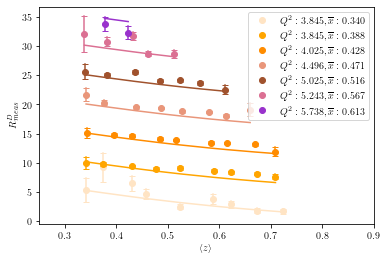

In [14]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
xbj_ones_center = df[df['Q2']==4.75]['xbj'].unique()
RD_offset = 0
for xi in xbj_ones_center:
    #print(xi)
    
    z_corrs = []
    RD_alls = []
    xbj_corr_xbj = []
    xbj_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    zs_ones_center = df[df['Q2']==4.75][df['xbj']==xi].sort_values('z')['z'].unique()
    for zi in zs_ones_center:
        #print(zi)
        #print(xi,zi)
        RDs = []
        RDs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4.75][df['xbj']==xi][df['z']==zi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RDi=float(row['y_RD'])+RD_offset
            RDi_error = float(row['error_RD'])
            neg_D2_yield = row['yield_neg']
            pos_D2_yield = row['yield_pos']
            neg_rho_yield = row['yield_neg_rho']*row['radia_corr_neg']
            pos_rho_yield = row['yield_pos_rho']*row['radia_corr_pos']
            #print(neg_D2_yield,pos_D2_yield,neg_rho_yield)
            #RDi = RDi+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,m_Q2.values[4])
            RDs.append(RDi)
            RDs_error.append(RDi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        RD_alls.append(RD)
        plt.plot([z_corr,z_corr],[RD+RD_err,RD-RD_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    xbj_corr = Get_weighted_average(xbj_corr_xbj,xbj_err_xbj)
    plt.plot(z_corrs,RD_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{x}} :{xbj_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RDmeass = []
    for zhad in z_corrs:
        RDmeasi_fit = RDmeas_CSV_norho(math.sqrt(Q2_corr),zhad,xbj_corr,1,1,1,1,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],0,i_PDF,i_FF)
        RDmeass.append(RDmeasi_fit+RD_offset)
    plt.plot(z_corrs,RDmeass,color = colors_all[i_color])
    RD_offset = RD_offset+5
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$R^D_{meas}$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RDxz_z_2nd.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/1255450967.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  zs_ones_center = df[df['Q2']==5.5][df['xbj']==xi].sort_values('z')['z'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/1255450967.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==5.5][df['xbj']==xi][df['z']==zi].iterrows():


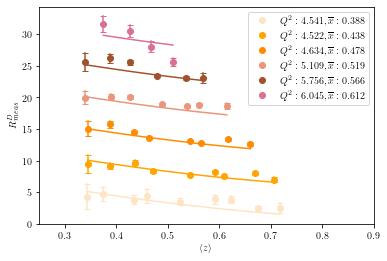

In [15]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
xbj_ones_center = df[df['Q2']==5.5]['xbj'].unique()
RD_offset = 0
for xi in xbj_ones_center:
    #print(xi)
    
    z_corrs = []
    RD_alls = []
    xbj_corr_xbj = []
    xbj_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    zs_ones_center = df[df['Q2']==5.5][df['xbj']==xi].sort_values('z')['z'].unique()
    for zi in zs_ones_center:
        #print(zi)
        #print(xi,zi)
        RDs = []
        RDs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==5.5][df['xbj']==xi][df['z']==zi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RDi=float(row['y_RD'])+RD_offset
            RDi_error = float(row['error_RD'])
            neg_D2_yield = row['yield_neg']
            pos_D2_yield = row['yield_pos']
            neg_rho_yield = row['yield_neg_rho']*row['radia_corr_neg']
            pos_rho_yield = row['yield_pos_rho']*row['radia_corr_pos']
            #print(neg_D2_yield,pos_D2_yield,neg_rho_yield)
            #RDi = RDi+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,m_Q2.values[4])
            RDs.append(RDi)
            RDs_error.append(RDi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        RD_alls.append(RD)
        plt.plot([z_corr,z_corr],[RD+RD_err,RD-RD_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    xbj_corr = Get_weighted_average(xbj_corr_xbj,xbj_err_xbj)
    plt.plot(z_corrs,RD_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{x}} :{xbj_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RDmeass = []
    for zhad in z_corrs:
        RDmeasi_fit = RDmeas_CSV_norho(math.sqrt(Q2_corr),zhad,xbj_corr,1,1,1,1,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],0,i_PDF,i_FF)
        RDmeass.append(RDmeasi_fit+RD_offset)
    plt.plot(z_corrs,RDmeass,color = colors_all[i_color])
    RD_offset = RD_offset+5
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle z \rangle$')
plt.ylabel(r'$R^D_{meas}$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RDxz_z_3rd.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/2386251658.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbjs_ones_center = df[df['Q2']==4][df['z']==zi].sort_values('xbj')['xbj'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/2386251658.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4][df['z']==zi][df['xbj']==xi].iterrows():


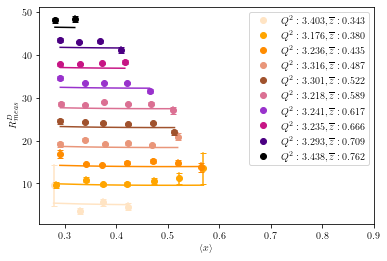

In [16]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
zs_ones_center = df[df['Q2']==4]['z'].unique()
RD_offset = 0
for zi in zs_ones_center:
    #print(xi)
    z_corrs = []
    z_corrs_errs = []
    xbj_corrs = []
    RD_alls = []
    xbj_corr_xbj = []
    #z_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    xbjs_ones_center = df[df['Q2']==4][df['z']==zi].sort_values('xbj')['xbj'].unique()
    for xi in xbjs_ones_center:
        #print(zi)
        #print(xi,zi)
        RDs = []
        RDs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4][df['z']==zi][df['xbj']==xi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RDi=float(row['y_RD'])+RD_offset
            RDi_error = float(row['error_RD'])
            neg_D2_yield = row['yield_neg']
            pos_D2_yield = row['yield_pos']
            neg_rho_yield = row['yield_neg_rho']*row['radia_corr_neg']
            pos_rho_yield = row['yield_pos_rho']*row['radia_corr_pos']
            #print(neg_D2_yield,pos_D2_yield,neg_rho_yield)
            #RDi = RDi+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,m_Q2.values[4])
            RDs.append(RDi)
            RDs_error.append(RDi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        z_corrs_errs.append(z_corr_err)
        RD_alls.append(RD)
        plt.plot([xbj_corr_z,xbj_corr_z],[RD+RD_err,RD-RD_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    z_corr = Get_weighted_average(z_corrs,z_corrs_errs)
    plt.plot(xbj_corr_xbj,RD_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{z}} :{z_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RDmeass = []
    for xbji in xbj_corr_xbj:
        RDmeasi_fit = (RDmeas_CSV_norho(math.sqrt(Q2_corr),z_corr,xbji,1,1,1,1,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],0,i_PDF,i_FF))
        RDmeass.append(RDmeasi_fit+RD_offset)
    plt.plot(xbj_corr_xbj,RDmeass,color = colors_all[i_color])
    RD_offset = RD_offset+5
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$R^D_{meas}$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RDxz_x_1st.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/166856043.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbjs_ones_center = df[df['Q2']==4.75][df['z']==zi].sort_values('xbj')['xbj'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/166856043.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4.75][df['z']==zi][df['xbj']==xi].iterrows():


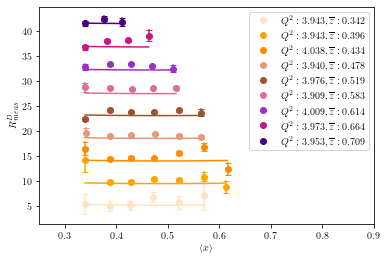

In [17]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
zs_ones_center = df[df['Q2']==4.75]['z'].unique()
RD_offset = 0
for zi in zs_ones_center:
    #print(xi)
    z_corrs = []
    z_corrs_errs = []
    xbj_corrs = []
    RD_alls = []
    xbj_corr_xbj = []
    #z_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    xbjs_ones_center = df[df['Q2']==4.75][df['z']==zi].sort_values('xbj')['xbj'].unique()
    for xi in xbjs_ones_center:
        #print(zi)
        #print(xi,zi)
        RDs = []
        RDs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==4.75][df['z']==zi][df['xbj']==xi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RDi=float(row['y_RD'])+RD_offset
            RDi_error = float(row['error_RD'])
            neg_D2_yield = row['yield_neg']
            pos_D2_yield = row['yield_pos']
            neg_rho_yield = row['yield_neg_rho']*row['radia_corr_neg']
            pos_rho_yield = row['yield_pos_rho']*row['radia_corr_pos']
            #print(neg_D2_yield,pos_D2_yield,neg_rho_yield)
            #RDi = RDi+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,m_Q2.values[4])
            RDs.append(RDi)
            RDs_error.append(RDi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        z_corrs_errs.append(z_corr_err)
        RD_alls.append(RD)
        plt.plot([xbj_corr_z,xbj_corr_z],[RD+RD_err,RD-RD_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    z_corr = Get_weighted_average(z_corrs,z_corrs_errs)
    plt.plot(xbj_corr_xbj,RD_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{z}} :{z_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RDmeass = []
    for xbji in xbj_corr_xbj:
        RDmeasi_fit = (RDmeas_CSV_norho(math.sqrt(Q2_corr),z_corr,xbji,1,1,1,1,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],0,i_PDF,i_FF))
        RDmeass.append(RDmeasi_fit+RD_offset)
    plt.plot(xbj_corr_xbj,RDmeass,color = colors_all[i_color])
    RD_offset = RD_offset+5
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$R^D_{meas}$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RDxz_x_2nd.png")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/92261979.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xbjs_ones_center = df[df['Q2']==5.5][df['z']==zi].sort_values('xbj')['xbj'].unique()
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/92261979.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==5.5][df['z']==zi][df['xbj']==xi].iterrows():


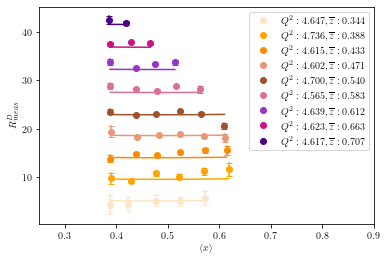

In [18]:
i_color = 0
colors_all = ['bisque','orange','darkorange','darksalmon','sienna','palevioletred','darkorchid','mediumvioletred','indigo','black']
zs_ones_center = df[df['Q2']==5.5]['z'].unique()
RD_offset = 0
for zi in zs_ones_center:
    #print(xi)
    z_corrs = []
    z_corrs_errs = []
    xbj_corrs = []
    RD_alls = []
    xbj_corr_xbj = []
    #z_err_xbj = []
    Q2_corr_xbj = []
    Q2_err_xbj = []
    xbjs_ones_center = df[df['Q2']==5.5][df['z']==zi].sort_values('xbj')['xbj'].unique()
    for xi in xbjs_ones_center:
        #print(zi)
        #print(xi,zi)
        RDs = []
        RDs_error = []
        zs_corr = []
        zs_corr_err = []
        xbjs_corr = []
        xbjs_corr_err = []
        Q2s_corr = []
        Q2s_corr_err = []
        for i,row in df[df['Q2']==5.5][df['z']==zi][df['xbj']==xi].iterrows():
            zi_corr = float(row['z_corr'])
            zi_corr_err = float(row['z_corr_err'])
            xbji_corr = float(row['xbj_corr'])
            xbji_corr_err = float(row['xbj_corr_err'])
            #xbjs_corr.append(xbji_corr)
            #xbjs_corr_err.append(xbji_corr_err)
            Q2i_corr = float(row['Q2_corr'])
            Q2i_corr_err = float(row['Q2_corr_err'])
            #z_hadron = float(key_z)
            
        #for key_RunGroup,RunGroup_value in z_value.items():
            
            RunGroup = float(row['RunGroup'])
            RDi=float(row['y_RD'])+RD_offset
            RDi_error = float(row['error_RD'])
            neg_D2_yield = row['yield_neg']
            pos_D2_yield = row['yield_pos']
            neg_rho_yield = row['yield_neg_rho']*row['radia_corr_neg']
            pos_rho_yield = row['yield_pos_rho']*row['radia_corr_pos']
            #print(neg_D2_yield,pos_D2_yield,neg_rho_yield)
            #RDi = RDi+dRDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,m_Q2.values[4])
            RDs.append(RDi)
            RDs_error.append(RDi_error)
            zs_corr.append(zi_corr)
            zs_corr_err.append(zi_corr_err)
            xbjs_corr.append(xbji_corr)
            xbjs_corr_err.append(xbji_corr_err)
            Q2s_corr.append(Q2i_corr)
            Q2s_corr_err.append(Q2i_corr_err)
        Q2_corr_z = Get_weighted_average(Q2s_corr,Q2s_corr_err)
        Q2_err_z = Get_weighted_sigma(Q2s_corr,Q2s_corr_err)
        Q2_corr_xbj.append(Q2_corr_z)
        Q2_err_xbj.append(Q2_err_z)
        xbj_corr_z = Get_weighted_average(xbjs_corr,xbjs_corr_err)
        xbj_corr_err_z = Get_weighted_sigma(xbjs_corr,xbjs_corr_err)
        xbj_corr_xbj.append(xbj_corr_z)
        xbj_err_xbj.append(xbj_corr_err_z)
        z_corr = Get_weighted_average(zs_corr,zs_corr_err)
        z_corr_err = Get_weighted_sigma(zs_corr,zs_corr_err)
        RD = Get_weighted_average(RDs,RDs_error)
        RD_err = Get_weighted_sigma(RDs,RDs_error)
        #W2 = 0.938**2+Q2*(1-xbj_corr)/xbj_corr
        #xbj_corrs.append(xbj_corr)
        z_corrs.append(z_corr)
        z_corrs_errs.append(z_corr_err)
        RD_alls.append(RD)
        plt.plot([xbj_corr_z,xbj_corr_z],[RD+RD_err,RD-RD_err],marker = "_",color = colors_all[i_color])
        Q2_corr = Get_weighted_average(Q2_corr_xbj,Q2_err_xbj)
    z_corr = Get_weighted_average(z_corrs,z_corrs_errs)
    plt.plot(xbj_corr_xbj,RD_alls,"o",label = f"$Q^2:{Q2_corr:.3f},\overline{{z}} :{z_corr:.3f}$",color = colors_all[i_color])#Q2,r'$ x $',str(xbj_corr)[0:5]),color = colors_all[i_color])
    RDmeass = []
    for xbji in xbj_corr_xbj:
        RDmeasi_fit = (RDmeas_CSV_norho(math.sqrt(Q2_corr),z_corr,xbji,1,1,1,1,m_Q2.values[0],m_Q2.values[1],m_Q2.values[2],m_Q2.values[3],0,i_PDF,i_FF))
        RDmeass.append(RDmeasi_fit+RD_offset)
    plt.plot(xbj_corr_xbj,RDmeass,color = colors_all[i_color])
    RD_offset = RD_offset+5
    #r'$\langle B_{\mathrm{e}} \rangle$'
    
    #plt.title(Q2)
    i_color +=1
plt.xlabel(r'$\langle x \rangle$')
plt.ylabel(r'$R^D_{meas}$')
plt.xlim(0.25,0.9)
plt.legend()
#plt.ylim(0,10)
plt.savefig("results/RDxz_x_3rd.png")

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/JAM20-SIDIS_FF_pion_nlo/JAM20-SIDIS_FF_pion_nlo_0000.dat
JAM20-SIDIS_FF_pion_nlo PDF set, member #0, version 2


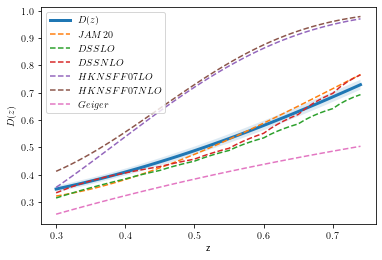

In [19]:
#dont

zhad_fit = np.arange(0.3,0.75,0.01)
from iminuit.util import propagate
def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def D_z_from_deltaz(deltaz,deltaz_err):
    D_z = (1-deltaz)/(1+deltaz)
    D_zerr = (2*deltaz_err)/(1+deltaz)**2
    return D_z,D_zerr
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

Q = 2
JAM20 = lhapdf.mkPDF("JAM20-SIDIS_FF_pion_nlo", 0)
JAM20_Deltaz = []
DSS_LO = []
DSS_NLO = []
HKNSFF07_LO = []
HKNSFF07_NLO = []
Geiger = []
z_axis = np.arange(0.3,0.75,0.01)
for zi in z_axis:
    dup = JAM20.xfxQ(2,zi,Q)
    dum = JAM20.xfxQ(-2,zi,Q)
    #print(dup,' ',dum)
    JAM20_Deltaz.append(dum/dup)
    DSS_LO.append(fDSS_.fdss(1,-1,0,zi,Q*Q)[0]/fDSS_.fdss(1,1,0,zi,4.75)[0])
    DSS_NLO.append(fDSS_.fdss(1,-1,1,zi,Q*Q)[0]/fDSS_.fdss(1,1,1,zi,4.75)[0])
    ff = np.zeros(11)
    grad = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,1,ff,grad)
    ff_minus = np.zeros(11)
    grad_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,1,2,ff_minus,grad_minus)
    duplus = zi*ff[6]
    duminus = zi*ff_minus[6]
    HKNSFF07_LO.append(duminus/duplus)
    ff_NLO = np.zeros(11)
    grad_NLO = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,1,ff_NLO,grad_NLO)
    ff_NLO_minus = np.zeros(11)
    grad_NLO_minus = np.zeros((11,17))
    hknsff07_.hknsff(Q*Q,zi,2,2,ff_NLO_minus,grad_NLO_minus)
    duplus_NLO = zi*ff_NLO[6]
    duminus_NLO = zi*ff_NLO_minus[6]
    HKNSFF07_NLO.append(duminus_NLO/duplus_NLO)
    R_D = (1.0-zi)**0.0083583/(1.0+zi)**1.9838
    Geiger.append(R_D)


plt.plot(z_axis,(1-np.asarray(JAM20_Deltaz))/(1+np.asarray(JAM20_Deltaz)),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$D(z)$')
plt.xlabel('z')
plt.plot(z_axis,(1-np.asarray(DSS_LO))/(1+np.asarray(DSS_LO)),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,(1-np.asarray(DSS_NLO))/(1+np.asarray(DSS_NLO)),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_LO))/(1+np.asarray(HKNSFF07_LO)),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,(1-np.asarray(HKNSFF07_NLO))/(1+np.asarray(HKNSFF07_NLO)),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.plot(z_axis,(1-np.asarray(Geiger))/(1+np.asarray(Geiger)),linestyle = 'dashed',label = r'$Geiger$')




plt.legend()
plt.savefig("results/Dz_err_7rhoall.pdf")

#print(D_z_all[1])

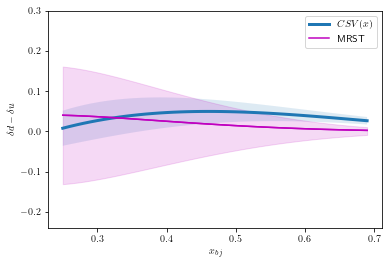

In [20]:
#def CSVx_param(xbj,a,b):
#    #a = -0.5 
#    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
#    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
xbj_fit = np.arange(0.25,0.7,0.01)
def CSVx_param(xbj,params):
    a = params[2]
    #a = -0.5
    b = params[3]
    c = sc.beta(b+2,a+1)/sc.beta(b+1,a+1)
    CSVx = (1-xbj)**a*xbj**b*(xbj-c)
    #c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)



def delta_udv(parameter):
    x = np.arange(0.25,0.7,0.01)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.25,0.7,0.01)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)
#plt.plot(x_axis,y_delta_dv-y_delta_uv,label = 'xCSV')
#plt.plot(x_axis,y_delta_uv_up-y_delta_uv_low,'-.')
#plt.plot(x_axis,y_delta_dv_up-y_delta_dv_low,'--')
plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")

plt.savefig("results/CSV_err_7rhoall.pdf")

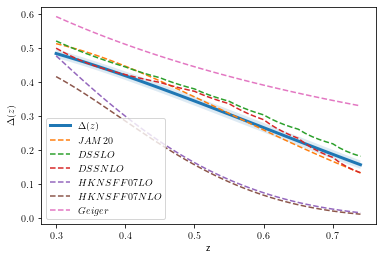

In [21]:
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\Delta(z)$")
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
plt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)

plt.plot(z_axis,np.asarray(JAM20_Deltaz),linestyle='dashed',label = r'$JAM20$')
plt.ylabel(r'$\Delta(z)$')
plt.xlabel('z')
plt.plot(z_axis,np.asarray(DSS_LO),linestyle='dashed',label = r'$DSS LO$')
plt.plot(z_axis,np.asarray(DSS_NLO),linestyle='dashed',label = r'$DSS NLO$')
plt.plot(z_axis,np.asarray(HKNSFF07_LO),linestyle='dashed',label = r'$HKNSFF07 LO$')
plt.plot(z_axis,np.asarray(HKNSFF07_NLO),linestyle='dashed',label = r'$HKNSFF07 NLO$')
plt.plot(z_axis,np.asarray(Geiger),linestyle = 'dashed',label = r'$Geiger$')
plt.legend()
plt.savefig("results/Deltaz_err_7rhoall.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0, 'error bars for good Residual Arho')

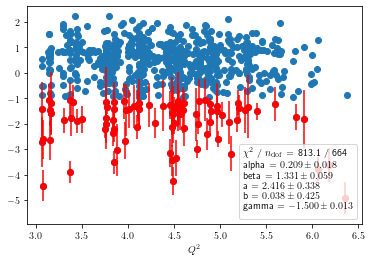

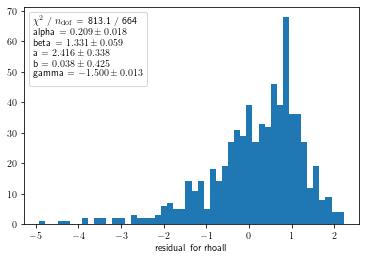

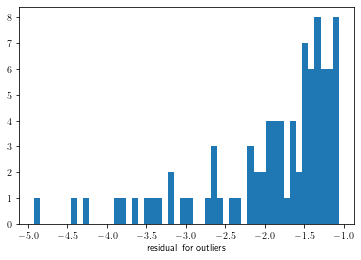

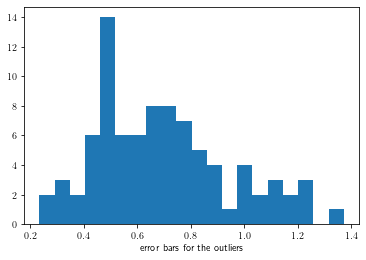

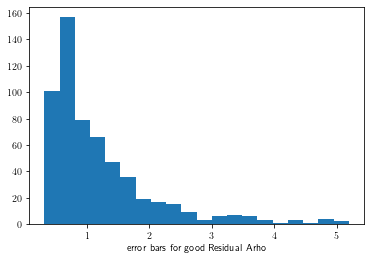

In [22]:
#plt.plot(dfrhorhoallout['Q2_corr'],dfrhorhoallout['Residual_Arho'],'bo')
#plt.hist(dfrhorhoallout['Residual_Arho'],50)
plt.scatter(dfrhoallout['Q2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['Q2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Q2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Q^2$')
plt.legend(title="\n".join(fit_info))
plt.savefig("results/Residual_7assumption_rhoall_Q2.pdf")
#print(len(dfrhoallout['Residual_Arho']))
fig,ax = plt.subplots() 
plt.hist(dfrhoallout['Residual_Arho'],50)
plt.xlabel('residual for rhoall')
plt.legend(title="\n".join(fit_info))
plt.savefig("results/Residual_7assumption_rhoall.pdf")
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],50)
plt.xlabel('residual for outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],20)
plt.xlabel('error bars for the outliers')
fig,ax = plt.subplots() 
plt.hist(dfrhoallout[dfrhoallout['Residual_Arho']>-1]['error_RD'],20)
plt.xlabel('error bars for good Residual Arho')

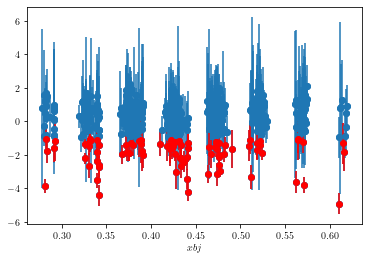

In [23]:
plt.scatter(dfrhoallout['xbj_corr'],dfrhoallout['Residual_Arho'])
plt.errorbar(dfrhoallout['xbj_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['xbj_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$xbj$')
plt.savefig("results/Residual_7assumption_rhoall_xbj.pdf")

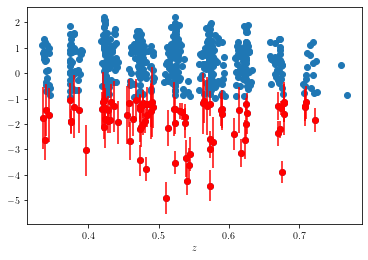

In [24]:
plt.scatter(dfrhoallout['z_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['z_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['z_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$z$')
plt.savefig("results/Residual_7assumption_rhoall_z.pdf")

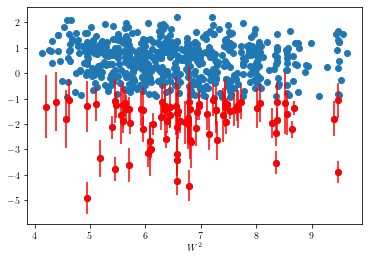

In [25]:
plt.scatter(dfrhoallout['W2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['W2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['W2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$W^2$')
plt.savefig("results/Residual_7assumption_rhoall_W2.pdf")

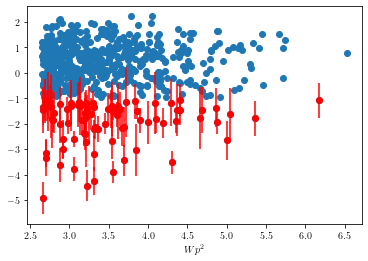

In [26]:
plt.scatter(dfrhoallout['Wp2_corr'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['Wp2_corr'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Wp2_corr'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$Wp^2$')
plt.savefig("results/Residual_7assumption_rhoall_Wp2.pdf")

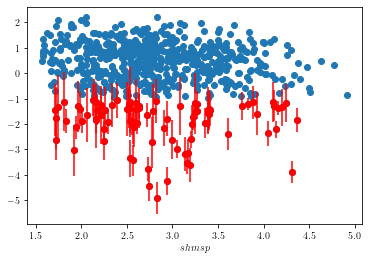

In [27]:
plt.scatter(dfrhoallout['shms_p'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['shms_p'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['shms_p'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsp$')
plt.savefig("results/Residual_7assumption_rhoall_shms_p.pdf")

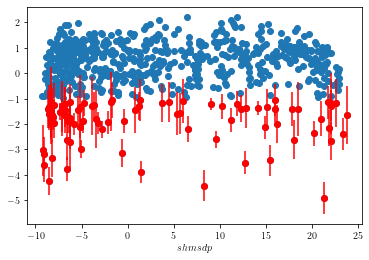

In [28]:
plt.scatter(dfrhoallout['shms_dp'],dfrhoallout['Residual_Arho'])
#plt.errorbar(dfrhoallout['shms_dp'],dfrhoallout['Residual_Arho'],dfrhoallout['error_RD'],fmt = 'o')
plt.errorbar(dfrhoallout[dfrhoallout['Residual_Arho']<-1]['shms_dp'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['Residual_Arho'],dfrhoallout[dfrhoallout['Residual_Arho']<-1]['error_RD'],fmt = 'o',color = 'r')
plt.xlabel(r'$shmsdp$')
plt.savefig("results/Residual_7assumption_rhoall_shms_dp.pdf")

In [29]:
import scipy.integrate as integrate
print(integrate.quad(CSVx_param,0,1,parameters[0]))



(-1.018885460561353e-12, 4.54797409548722e-09)


In [30]:
a = parameters[0][3]
b = parameters[0][2]
c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
print(c)

0.23307808348970013


In [31]:

def MRST_CSV(x,k):
    return 2*k*(1-x)**4*x**-0.5*(x-0.0909)




In [32]:
def Ax(Q,xbj):
    uv = 0
    dv = 0
    if i_PDF == 0:
        uv = p_cteq6.xfxQ(2,xbj,Q)-p_cteq6.xfxQ(-2,xbj,Q)
        dv = p_cteq6.xfxQ(1,xbj,Q)-p_cteq6.xfxQ(-1,xbj,Q)
    elif i_PDF == 1:
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-JAM20_PDF.xfxQ(-2,xbj,Q)
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-JAM20_PDF.xfxQ(-1,xbj,Q)
    elif i_PDF ==2:
        uv = p_cteq18.xfxQ(2,xbj,Q)-p_cteq18.xfxQ(-2,xbj,Q)
        dv = p_cteq18.xfxQ(1,xbj,Q)-p_cteq18.xfxQ(-1,xbj,Q)
    return -4/(3*(uv+dv))
def Bx(Q,xbj,z_had):
    duplus = 0
    duminus = 0
    dsplus = 0
    dsminus = 0
    delta_z = 0
    
    if i_FF==2:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
        
    elif i_FF==0:
        duplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,0,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,0,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
    elif i_FF==1:
        duplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[0]
        duminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[0]
        dsplus = fDSS_.fdss(1,1,1,z_hadron,Q*Q)[4]
        dsminus = fDSS_.fdss(1,-1,1,z_hadron,Q*Q)[4]
        delta_z = duminus/duplus
        #return (1-delta_z)/(1+delta_z)
    elif i_FF==3:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,1,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_FF==4:
        
        ff = np.zeros(11)
        grad = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,1,ff,grad)
        ff_minus = np.zeros(11)
        grad_minus = np.zeros((11,17))
        hknsff07_.hknsff(Q*Q,z_hadron,2,2,ff_minus,grad_minus)
        duplus = ff[6]
        dsplus = ff[8]
        duminus = ff_minus[6]
        dsminus = ff_minus[8]
        delta_z = duminus/duplus
    elif i_FF==5:
        duplus = JAM20.xfxQ(2,z_had,Q)
        duminus = JAM20.xfxQ(-2,z_had,Q)
        dsplus = JAM20.xfxQ(3,z_had,Q)
        dsminus = JAM20.xfxQ(-3,z_had,Q)
        delta_z = duminus/duplus
    ubar = 0
    dbar = 0
    uv = 0
    dv = 0
    strange = 0
    sbar = 0
    if i_PDF == 0:
        ubar = p_cteq6.xfxQ(-2,xbj,Q)
        dbar = p_cteq6.xfxQ(-1,xbj,Q)
        uv = p_cteq6.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq6.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq6.xfxQ(3,xbj,Q)
        sbar = p_cteq6.xfxQ(-3,xbj,Q)
    elif i_PDF == 1:
        ubar = JAM20_PDF.xfxQ(-2,xbj,Q)
        dbar = JAM20_PDF.xfxQ(-1,xbj,Q)
        uv = JAM20_PDF.xfxQ(2,xbj,Q)-ubar
        dv = JAM20_PDF.xfxQ(1,xbj,Q)-dbar
        strange = JAM20_PDF.xfxQ(3,xbj,Q)
        sbar = JAM20_PDF.xfxQ(-3,xbj,Q)
    elif i_PDF == 2:
        ubar = p_cteq18.xfxQ(-2,xbj,Q)
        dbar = p_cteq18.xfxQ(-1,xbj,Q)
        uv = p_cteq18.xfxQ(2,xbj,Q)-ubar
        dv = p_cteq18.xfxQ(1,xbj,Q)-dbar
        strange = p_cteq18.xfxQ(3,xbj,Q)
        sbar = p_cteq18.xfxQ(-3,xbj,Q)
    B_NS = 5*(ubar+dbar)/(uv+dv)
    B_sz = (dsplus+dsminus)/duplus/(1+delta_z) 
    B_S = B_sz*(strange+sbar)/(uv+dv)
    return 5/2+B_NS+B_S
def RDmeas_rho(neg_D2_yield,pos_D2_yield,neg_rho_yield,pos_rho_yield,a):
    neg_yield = neg_D2_yield+a*neg_rho_yield
    pos_yield = pos_D2_yield+a*pos_rho_yield
    RY = neg_yield/pos_yield
    RD = (4*RY-1)/(1-RY)
    return RD
def Dz(Q,z_had):
    deltaz = z_had**(params[0])*(1-z_had)**(params[1])
    return (1-deltaz)/(1+deltaz)

In [33]:
def CSVx(Q,z_had,xbj,RDmeas):
    return (Bx(Q,xbj,z_had)-Dz(Q,z_had)*(RDmeas+2.5))/Ax(Q,xbj)
def CSVx_err(Q,z_had,xbj,RDmeas):
    return -Dz(Q,z_had)*(RDmeas)/Ax(Q,xbj)

'''
def Deltaz_param(z_had,params):
    delta_z = z_had**params[0]*(1-z_had)**params[1]
    return delta_z
def D_z_from_deltaz(deltaz,deltaz_err):
    D_z = (1-deltaz)/(1+deltaz)
    D_zerr = (2*deltaz_err)/(1+deltaz)**2
    return D_z,D_zerr
Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\Delta(z)$")
Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
plt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)
xbj_fit = np.arange(0.25,0.7,0.01)
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_fit, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

Dz_err = D_z_all[1]
'''





'\ndef Deltaz_param(z_had,params):\n    delta_z = z_had**params[0]*(1-z_had)**params[1]\n    return delta_z\ndef D_z_from_deltaz(deltaz,deltaz_err):\n    D_z = (1-deltaz)/(1+deltaz)\n    D_zerr = (2*deltaz_err)/(1+deltaz)**2\n    return D_z,D_zerr\nDeltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)\nDeltaz_err_prop_all = np.diag(Deltacov_all)**0.5\nD_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)\nplt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")\nplt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)\n\nDeltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)\nplt.plot(zhad_fit,Deltaz_all,lw = 3,label = r"$\\Delta(z)$")\nDeltaz_err_prop_all = np.diag(Deltacov_all)**0.5\nplt.fill_between(zhad_fit,Deltaz_all-Deltaz_err_prop_all,Deltaz_all+Deltaz_err_prop_all,alpha = 0.15)\nxbj_fit = np.arange(0.25,0.7,0.01)\ndef CSVx_param(xbj,params):\n    a = p

In [34]:
xbj_ones_corr = []
xbj_ones_err = []
CSV_ones = []
CSV_ones_err = []
xbj_ones_plot = []
z_ones_plot = []
Q2s_ones_plot = []
CSV_ones_plot = []
CSV_ones_err_plot = []
RD_ones_plot = []
xbj_twos_corr = []
xbj_twos_err = []
CSV_twos = []
CSV_twos_err = []
xbj_twos_plot = []
z_twos_plot = []
Q2s_twos_plot = []
CSV_twos_plot = []
CSV_twos_err_plot = []
RD_twos_plot = []
xbj_threes_corr = []
xbj_threes_err = []
CSV_threes = []
CSV_threes_err = []
xbj_threes_plot = []
z_threes_plot = []
Q2s_threes_plot = []
CSV_threes_plot = []
CSV_threes_err_plot = []
RD_threes_plot = []

In [35]:
#df.head()
print(params)
#print(Dz(3.789,0.378))
#print(CSVx(3.89,0.345,0.367,8))

<ValueView alpha=0.20913119336767483 beta=1.3307868041697344 a=2.4156916046899 b=0.03807550139596034 gamma=-1.4999999505384767>


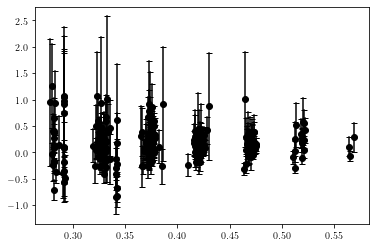

In [36]:
zs_ones_corr = []
for i,row in df[df['Q2']==4].iterrows():
    yield_neg_D2 = row['yield_neg']
    yield_pos_D2 = row['yield_pos']
    yield_neg_rho = row['yield_neg_rho']*row['radia_corr_neg']
    yield_pos_rho = row['yield_pos_rho']*row['radia_corr_pos']
    RDi_rho = RDmeas_rho(yield_neg_D2,yield_pos_D2,yield_neg_rho,yield_pos_rho,a_rho)
    #RDi_rho=float(row["y_RD"])
    RDi_error = float(row['error_RD'])
    #RDs.append(RDi)
    #RDs_rho.append(RDi_rho)
    #RDs_error.append(RDi_error)
    #print('RD_error ',RD_error)
    zi_corr = float(row['z_corr'])
    zs_ones_corr.append(zi_corr)
    #zi_corr_err = float(row['z_corr_err'])
    #zs_corr_err.append(zi_corr_err)
    xbji_corr = float(row['xbj_corr'])
    #xbji_corr_err = float(row['xbj_corr_err'])
    #xbjs_corr.append(xbji_corr)
    #xbjs_corr_err.append(xbji_corr_err)
    Q2i_corr = float(row['Q2_corr'])
    #Q2i_corr_err = float(row['Q2_corr_err'])
    #Q2s_corr.append(Q2i_corr)
    #Q2s_corr_err.append(Q2i_corr_err)
    if Q2i_corr<3:
        print(Q2i_corr)
         
    CSVxzi = CSVx(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_rho)
    CSVxzi_err = CSVx_err(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_error)
    CSV_ones.append(CSVxzi)
    CSV_ones_err.append(CSVxzi_err)
    xbj_ones_corr.append(xbji_corr)

    #print(row['xbj'])
plt.scatter(xbj_ones_corr,CSV_ones,color = 'k')
for i in range(len(CSV_ones)):
    plt.plot([xbj_ones_corr[i],xbj_ones_corr[i]],[CSV_ones[i]-CSV_ones_err[i],CSV_ones[i]+CSV_ones_err[i]],marker = "_",color = "k")


#plt.plot(xbj_ones_corr,np.asarray(CSV_ones)-np.asarray(CSV_ones_err),np.asarray(CSV_ones)+np.asarray(CSV_ones_err))

0.275
0.325
0.375
0.425
0.475
0.525
0.575


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/545087141.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4][df['xbj']==xi].iterrows():


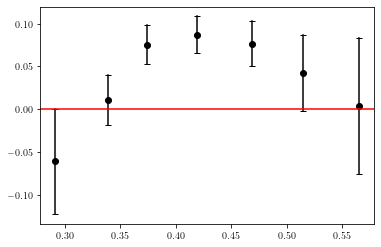

In [37]:
xbj_ones_center = df[df['Q2']==4]['xbj'].unique()
for xi in xbj_ones_center:
    print(xi)
    CSVxi_ones_plot = []
    CSVxi_ones_err_plot = []
    xbjxi_ones_corr_plot = []
    xbjxi_ones_err_plot = []
    zxi_ones_corr_plot = []
    zxi_ones_err_plot = []
    Q2sxi_ones_corr_plot = []
    Q2sxi_ones_err_plot = []
    RDxi_ones_plot = []
    RDxi_ones_err_plot = []
    for i,row in df[df['Q2']==4][df['xbj']==xi].iterrows():
        yield_neg_D2 = row['yield_neg']
        yield_pos_D2 = row['yield_pos']
        yield_neg_rho = row['yield_neg_rho']*row['radia_corr_neg']
        yield_pos_rho = row['yield_pos_rho']*row['radia_corr_pos']
        RDi_rho = RDmeas_rho(yield_neg_D2,yield_pos_D2,yield_neg_rho,yield_pos_rho,a_rho)
        #RDi_rho=float(row["y_RD"])
        RDi_error = float(row['error_RD'])
        #RDs.append(RDi)
        #RDs_rho.append(RDi_rho)
        #RDs_error.append(RDi_error)
        #print('RD_error ',RD_error)
        zi_corr = float(row['z_corr'])
        zi_corr_err = float(row['z_corr_err'])
        xbji_corr = float(row['xbj_corr'])
        xbji_corr_err = float(row['xbj_corr_err'])
        #xbjs_corr.append(xbji_corr)
        #xbjs_corr_err.append(xbji_corr_err)
        Q2i_corr = float(row['Q2_corr'])
        Q2i_corr_err = float(row['Q2_corr_err'])
        #Q2s_corr.append(Q2i_corr)
        #Q2s_corr_err.append(Q2i_corr_err)
        if Q2i_corr<3:
            print(Q2i_corr)
         
        CSVxzi = CSVx(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_rho)
        CSVxzi_err = CSVx_err(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_error)
        CSVxi_ones_plot.append(CSVxzi)
        CSVxi_ones_err_plot.append(CSVxzi_err)
        xbjxi_ones_corr_plot.append(xbji_corr)
        xbjxi_ones_err_plot.append(xbji_corr_err)
        zxi_ones_corr_plot.append(zi_corr)
        zxi_ones_err_plot.append(zi_corr_err)
        Q2sxi_ones_corr_plot.append(Q2i_corr)
        Q2sxi_ones_err_plot.append(Q2i_corr_err)
        RDxi_ones_plot.append(RDi_rho)
        RDxi_ones_err_plot.append(RDi_error)
    CSVi_ones_plot = Get_weighted_average(CSVxi_ones_plot,CSVxi_ones_err_plot)
    CSVi_ones_err_plot = Get_weighted_sigma(CSVxi_ones_plot,CSVxi_ones_err_plot)
    xbji_ones_plot = Get_weighted_average(xbjxi_ones_corr_plot,xbjxi_ones_err_plot)
    zi_ones_plot = Get_weighted_average(zxi_ones_corr_plot,zxi_ones_err_plot)
    Q2si_ones_plot = Get_weighted_average(Q2sxi_ones_corr_plot,Q2sxi_ones_err_plot)
    RDi_ones_plot = Get_weighted_average(RDxi_ones_plot,RDxi_ones_err_plot)
    #RDi_ones_plot = Get_weighted_average(RDxi_ones_corr_plot,RDxi_ones_err_plot)
    #xbji_ones_err_plot = Get_weighted_sigma(xbjxi_ones_plot,xbjxi_ones_err_plot)
    CSV_ones_plot.append(CSVi_ones_plot)
    CSV_ones_err_plot.append(CSVi_ones_err_plot)
    xbj_ones_plot.append(xbji_ones_plot)
    z_ones_plot.append(zi_ones_plot)
    Q2s_ones_plot.append(Q2si_ones_plot)
    RD_ones_plot.append(RDi_ones_plot)
plt.scatter(xbj_ones_plot,CSV_ones_plot,color = 'k')
for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.axhline(y=0, color='r', linestyle='-')


[2.3291580419853926, 2.5671972246979124, 2.9625846367072923, 3.16843012241716, 3.3221864773406438, 3.19856009584499, 3.680640287996952]
0.2912328048165641
-0.017685420220792347
0.33941383847325274
-0.017304993355372947
0.3743319296027332
-0.01763100438340313
0.4194672144910058
-0.015573211106581922
0.46887910812663436
-0.012854636480944445
0.5145141106115285
-0.009843962323342998
0.5654133240666859
-0.008372798143156517


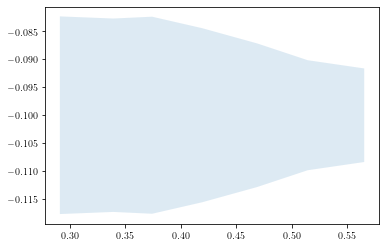

In [38]:

'''
Q = 2
def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,params):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
    #return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
CSVx_Dz_err_prop = CSVx_Dz_err(Q,Deltaz_all,Deltaz_err_prop_all,np.asarray(xbj_ones_plot),params)
#CSVx_Dz_err_prop = CSVx_Dz_err(Q,D_z_all[1],np.asarray(xbj_ones_corr),params);
plt.fill_between(xbj_ones_plot,-0.1-CSVx_Dz_err_prop,-0.1+CSVx_Dz_err_prop,alpha = 0.15)

#Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
#Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
#D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
#plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
#plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,CSVx):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*CSVx/Ax(Q,xbj)
CSVx_Dz_errs = []
for i in range(0,len(xbj_ones_plot)):
    print(xbj_ones_plot[i])
    print(CSV_ones_plot[i])
    CSVx_Dz_err_i = (CSVx_Dz_err(math.sqrt(Q2s_ones_plot[i]),Deltaz_all[i],Deltaz_err_prop_all[i],xbj_ones_plot[i],CSV_ones_plot[i]))
    print(CSVx_Dz_err_i)
    CSVx_Dz_errs.append(abs(CSVx_Dz_err_i))
plt.fill_between(xbj_ones_plot,-0.1-np.asarray(CSVx_Dz_errs),-0.1+np.asarray(CSVx_Dz_errs),alpha = 0.15)



'''
print(RD_ones_plot)
#def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,params):
#    Dz_err = (2*deltaz_err)/(1+deltaz)**2
#    return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,RDi):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*RDi/Ax(Q,xbj)
CSVx_ones_Dz_errs = []
for i in range(0,len(xbj_ones_plot)):
    print(xbj_ones_plot[i])
    #print(CSV_ones_plot[i])
    CSVx_Dz_err_i = (CSVx_Dz_err(math.sqrt(Q2s_ones_plot[i]),Deltaz_all[i],Deltaz_err_prop_all[i],xbj_ones_plot[i],RD_ones_plot[i]))
    print(CSVx_Dz_err_i)
    CSVx_ones_Dz_errs.append(abs(CSVx_Dz_err_i))
plt.fill_between(xbj_ones_plot,-0.1-np.asarray(CSVx_ones_Dz_errs),-0.1+np.asarray(CSVx_ones_Dz_errs),alpha = 0.15)




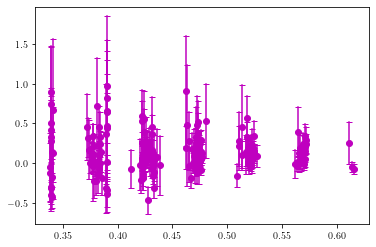

In [39]:
zs_twos_corr = []
for i,row in df[df['Q2']==4.75].iterrows():
    yield_neg_D2 = row['yield_neg']
    yield_pos_D2 = row['yield_pos']
    yield_neg_rho = row['yield_neg_rho']*row['radia_corr_neg']
    yield_pos_rho = row['yield_pos_rho']*row['radia_corr_pos']
    RDi_rho = RDmeas_rho(yield_neg_D2,yield_pos_D2,yield_neg_rho,yield_pos_rho,a_rho)
    #RDi_rho=float(row["y_RD"])
    RDi_error = float(row['error_RD'])
    #RDs.append(RDi)
    #RDs_rho.append(RDi_rho)
    #RDs_error.append(RDi_error)
    #print('RD_error ',RD_error)
    zi_corr = float(row['z_corr'])
    zs_twos_corr.append(zi_corr)
    #zi_corr_err = float(row['z_corr_err'])
    #zs_corr_err.append(zi_corr_err)
    xbji_corr = float(row['xbj_corr'])
    #xbji_corr_err = float(row['xbj_corr_err'])
    #xbjs_corr.append(xbji_corr)
    #xbjs_corr_err.append(xbji_corr_err)
    Q2i_corr = float(row['Q2_corr'])
    #Q2i_corr_err = float(row['Q2_corr_err'])
    #Q2s_corr.append(Q2i_corr)
    #Q2s_corr_err.append(Q2i_corr_err)
    if Q2i_corr<3:
        print(Q2i_corr)
         
    CSVxzi = CSVx(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_rho)
    CSVxzi_err = CSVx_err(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_error)
    CSV_twos.append(CSVxzi)
    CSV_twos_err.append(CSVxzi_err)
    xbj_twos_corr.append(xbji_corr)

    #print(row['xbj'])
plt.scatter(xbj_twos_corr,CSV_twos,color = 'm')
for i in range(len(CSV_twos)):
    plt.plot([xbj_twos_corr[i],xbj_twos_corr[i]],[CSV_twos[i]-CSV_twos_err[i],CSV_twos[i]+CSV_twos_err[i]],marker = "_",color = "m")


#plt.plot(xbj_twos_corr,np.asarray(CSV_twos)-np.asarray(CSV_twos_err),np.asarray(CSV_twos)+np.asarray(CSV_twos_err))

0.325
0.339620660014679
0.375
0.38777233329278443
0.425
0.4276908507575299
0.475
0.47080204677860776
0.525
0.5163181464539643
0.575
0.5667932159442068
0.625
0.6128315193131183


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/2605837046.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==4.75][df['xbj']==xi].iterrows():


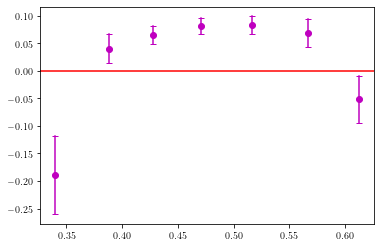

In [40]:
df_2 = df[df['Q2']==4.75].sort_values('xbj')
xbj_twos_center = df_2['xbj'].unique()
#xbj_twos_center = df[df['Q2']==4.75]['xbj'].unique()
#print(xbj_twos_center)
for xi in xbj_twos_center:
    print(xi)
    CSVxi_twos_plot = []
    CSVxi_twos_err_plot = []
    xbjxi_twos_corr_plot = []
    xbjxi_twos_err_plot = []
    zxi_twos_corr_plot = []
    zxi_twos_err_plot = []
    Q2sxi_twos_corr_plot = []
    Q2sxi_twos_err_plot = []
    RDxi_twos_plot = []
    RDxi_twos_err_plot = []
    for i,row in df[df['Q2']==4.75][df['xbj']==xi].iterrows():
        yield_neg_D2 = row['yield_neg']
        yield_pos_D2 = row['yield_pos']
        yield_neg_rho = row['yield_neg_rho']*row['radia_corr_neg']
        yield_pos_rho = row['yield_pos_rho']*row['radia_corr_pos']
        RDi_rho = RDmeas_rho(yield_neg_D2,yield_pos_D2,yield_neg_rho,yield_pos_rho,a_rho)
        #RDi_rho=float(row["y_RD"])
        RDi_error = float(row['error_RD'])
        #RDs.append(RDi)
        #RDs_rho.append(RDi_rho)
        #RDs_error.append(RDi_error)
        #print('RD_error ',RD_error)
        zi_corr = float(row['z_corr'])
        zi_corr_err = float(row['z_corr_err'])
        xbji_corr = float(row['xbj_corr'])
        xbji_corr_err = float(row['xbj_corr_err'])
        #xbjs_corr.append(xbji_corr)
        #xbjs_corr_err.append(xbji_corr_err)
        Q2i_corr = float(row['Q2_corr'])
        Q2i_corr_err = float(row['Q2_corr_err'])
        #Q2s_corr.append(Q2i_corr)
        #Q2s_corr_err.append(Q2i_corr_err)
        if Q2i_corr<3:
            print(Q2i_corr)
         
        CSVxzi = CSVx(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_rho)
        CSVxzi_err = CSVx_err(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_error)
        CSVxi_twos_plot.append(CSVxzi)
        CSVxi_twos_err_plot.append(CSVxzi_err)
        xbjxi_twos_corr_plot.append(xbji_corr)
        xbjxi_twos_err_plot.append(xbji_corr_err)
        zxi_twos_corr_plot.append(zi_corr)
        zxi_twos_err_plot.append(zi_corr_err)
        Q2sxi_twos_corr_plot.append(Q2i_corr)
        Q2sxi_twos_err_plot.append(Q2i_corr_err)
        RDxi_twos_plot.append(RDi_rho)
        RDxi_twos_err_plot.append(RDi_error)
    CSVi_twos_plot = Get_weighted_average(CSVxi_twos_plot,CSVxi_twos_err_plot)
    CSVi_twos_err_plot = Get_weighted_sigma(CSVxi_twos_plot,CSVxi_twos_err_plot)
    xbji_twos_plot = Get_weighted_average(xbjxi_twos_corr_plot,xbjxi_twos_err_plot)
    print(xbji_twos_plot)
    zi_twos_plot = Get_weighted_average(zxi_twos_corr_plot,zxi_twos_err_plot)
    Q2si_twos_plot = Get_weighted_average(Q2sxi_twos_corr_plot,Q2sxi_twos_err_plot)
    RDi_twos_plot = Get_weighted_average(RDxi_twos_plot,RDxi_twos_err_plot)
    RD_twos_plot.append(RDi_twos_plot)
    #xbji_twos_err_plot = Get_weighted_sigma(xbjxi_twos_plot,xbjxi_twos_err_plot)
    CSV_twos_plot.append(CSVi_twos_plot)
    CSV_twos_err_plot.append(CSVi_twos_err_plot)
    xbj_twos_plot.append(xbji_twos_plot)
    z_twos_plot.append(zi_twos_plot)
    Q2s_twos_plot.append(Q2si_twos_plot)
plt.scatter(xbj_twos_plot,CSV_twos_plot,color = 'm')
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "m")
plt.axhline(y=0, color='r', linestyle='-')


0.339620660014679
-0.010997493204874023
0.38777233329278443
-0.016489413688122484
0.4276908507575299
-0.014653836733885407
0.47080204677860776
-0.01265673646390675
0.5163181464539643
-0.011067997057582907
0.5667932159442068
-0.00867201192634205
0.6128315193131183
-0.0042157282743804265


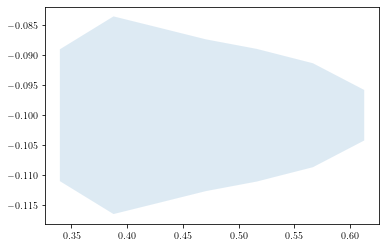

In [41]:

'''
Q = 2
def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,params):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
    #return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
CSVx_Dz_err_prop = CSVx_Dz_err(Q,Deltaz_all,Deltaz_err_prop_all,np.asarray(xbj_twos_plot),params)
#CSVx_Dz_err_prop = CSVx_Dz_err(Q,D_z_all[1],np.asarray(xbj_twos_corr),params);
plt.fill_between(xbj_twos_plot,-0.1-CSVx_Dz_err_prop,-0.1+CSVx_Dz_err_prop,alpha = 0.15)

#Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
#Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
#D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
#plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
#plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,CSVx):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*CSVx/Ax(Q,xbj)
CSVx_Dz_errs = []
for i in range(0,len(xbj_twos_plot)):
    print(xbj_twos_plot[i])
    print(CSV_twos_plot[i])
    CSVx_Dz_err_i = (CSVx_Dz_err(math.sqrt(Q2s_twos_plot[i]),Deltaz_all[i],Deltaz_err_prop_all[i],xbj_twos_plot[i],CSV_twos_plot[i]))
    print(CSVx_Dz_err_i)
    CSVx_Dz_errs.append(abs(CSVx_Dz_err_i))
plt.fill_between(xbj_twos_plot,-0.1-np.asarray(CSVx_Dz_errs),-0.1+np.asarray(CSVx_Dz_errs),alpha = 0.15)



'''

CSVx_twos_Dz_errs = []
for i in range(0,len(xbj_twos_plot)):
    print(xbj_twos_plot[i])
    #print(CSV_twos_plot[i])
    CSVx_Dz_err_i = (CSVx_Dz_err(math.sqrt(Q2s_twos_plot[i]),Deltaz_all[i],Deltaz_err_prop_all[i],xbj_twos_plot[i],RD_twos_plot[i]))
    print(CSVx_Dz_err_i)
    CSVx_twos_Dz_errs.append(abs(CSVx_Dz_err_i))
plt.fill_between(xbj_twos_plot,-0.1-np.asarray(CSVx_twos_Dz_errs),-0.1+np.asarray(CSVx_twos_Dz_errs),alpha = 0.15)




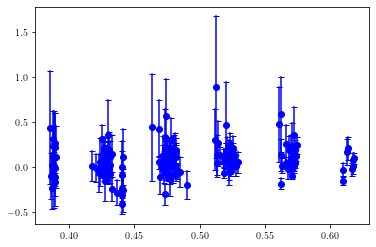

In [42]:
zs_threes_corr = []
for i,row in df[df['Q2']==5.5].iterrows():
    yield_neg_D2 = row['yield_neg']
    yield_pos_D2 = row['yield_pos']
    yield_neg_rho = row['yield_neg_rho']*row['radia_corr_neg']
    yield_pos_rho = row['yield_pos_rho']*row['radia_corr_pos']
    RDi_rho = RDmeas_rho(yield_neg_D2,yield_pos_D2,yield_neg_rho,yield_pos_rho,a_rho)
    #RDi_rho=float(row["y_RD"])
    RDi_error = float(row['error_RD'])
    #RDs.append(RDi)
    #RDs_rho.append(RDi_rho)
    #RDs_error.append(RDi_error)
    #print('RD_error ',RD_error)
    zi_corr = float(row['z_corr'])
    zs_threes_corr.append(zi_corr)
    #zi_corr_err = float(row['z_corr_err'])
    #zs_corr_err.append(zi_corr_err)
    xbji_corr = float(row['xbj_corr'])
    #xbji_corr_err = float(row['xbj_corr_err'])
    #xbjs_corr.append(xbji_corr)
    #xbjs_corr_err.append(xbji_corr_err)
    Q2i_corr = float(row['Q2_corr'])
    #Q2i_corr_err = float(row['Q2_corr_err'])
    #Q2s_corr.append(Q2i_corr)
    #Q2s_corr_err.append(Q2i_corr_err)
    if Q2i_corr<3:
        print(Q2i_corr)
         
    CSVxzi = CSVx(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_rho)
    CSVxzi_err = CSVx_err(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_error)
    CSV_threes.append(CSVxzi)
    CSV_threes_err.append(CSVxzi_err)
    xbj_threes_corr.append(xbji_corr)
    plt.scatter(xbji_corr,CSVxzi,color = 'b')


    #print(row['xbj'])
#plt.scatter(xbj_threes_corr,CSV_threes,color = 'b')
for i in range(len(CSV_threes)):
    plt.plot([xbj_threes_corr[i],xbj_threes_corr[i]],[CSV_threes[i]-CSV_threes_err[i],CSV_threes[i]+CSV_threes_err[i]],marker = "_",color = "b")


#plt.plot(xbj_threes_corr,np.asarray(CSV_threes)-np.asarray(CSV_threes_err),np.asarray(CSV_threes)+np.asarray(CSV_threes_err))

0.375
0.425
0.475
0.525
0.575
0.625


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/3508772287.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for i,row in df[df['Q2']==5.5][df['xbj']==xi].iterrows():


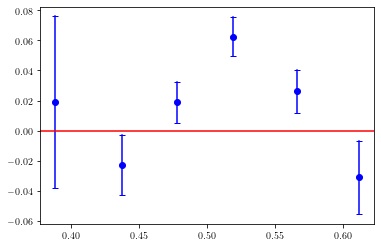

In [43]:
xbj_threes_center = df[df['Q2']==5.5].sort_values('xbj')['xbj'].unique()
for xi in xbj_threes_center:
    print(xi)
    CSVxi_threes_plot = []
    CSVxi_threes_err_plot = []
    xbjxi_threes_corr_plot = []
    xbjxi_threes_err_plot = []
    zxi_threes_corr_plot = []
    zxi_threes_err_plot = []
    Q2sxi_threes_corr_plot = []
    Q2sxi_threes_err_plot = []
    RDxi_threes_plot = []
    RDxi_threes_err_plot = []
    for i,row in df[df['Q2']==5.5][df['xbj']==xi].iterrows():
        yield_neg_D2 = row['yield_neg']
        yield_pos_D2 = row['yield_pos']
        yield_neg_rho = row['yield_neg_rho']*row['radia_corr_neg']
        yield_pos_rho = row['yield_pos_rho']*row['radia_corr_pos']
        RDi_rho = RDmeas_rho(yield_neg_D2,yield_pos_D2,yield_neg_rho,yield_pos_rho,a_rho)
        #RDi_rho=float(row["y_RD"])
        RDi_error = float(row['error_RD'])
        #RDs.append(RDi)
        #RDs_rho.append(RDi_rho)
        #RDs_error.append(RDi_error)
        #print('RD_error ',RD_error)
        zi_corr = float(row['z_corr'])
        zi_corr_err = float(row['z_corr_err'])
        xbji_corr = float(row['xbj_corr'])
        xbji_corr_err = float(row['xbj_corr_err'])
        #xbjs_corr.append(xbji_corr)
        #xbjs_corr_err.append(xbji_corr_err)
        Q2i_corr = float(row['Q2_corr'])
        Q2i_corr_err = float(row['Q2_corr_err'])
        #Q2s_corr.append(Q2i_corr)
        #Q2s_corr_err.append(Q2i_corr_err)
        if Q2i_corr<3:
            print(Q2i_corr)
         
        CSVxzi = CSVx(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_rho)
        CSVxzi_err = CSVx_err(math.sqrt(Q2i_corr),zi_corr,xbji_corr,RDi_error)
        CSVxi_threes_plot.append(CSVxzi)
        CSVxi_threes_err_plot.append(CSVxzi_err)
        xbjxi_threes_corr_plot.append(xbji_corr)
        xbjxi_threes_err_plot.append(xbji_corr_err)
        zxi_threes_corr_plot.append(zi_corr)
        zxi_threes_err_plot.append(zi_corr_err)
        Q2sxi_threes_corr_plot.append(Q2i_corr)
        Q2sxi_threes_err_plot.append(Q2i_corr_err)
        RDxi_threes_plot.append(RDi_rho)
        RDxi_threes_err_plot.append(RDi_error)
    CSVi_threes_plot = Get_weighted_average(CSVxi_threes_plot,CSVxi_threes_err_plot)
    CSVi_threes_err_plot = Get_weighted_sigma(CSVxi_threes_plot,CSVxi_threes_err_plot)
    xbji_threes_plot = Get_weighted_average(xbjxi_threes_corr_plot,xbjxi_threes_err_plot)
    zi_threes_plot = Get_weighted_average(zxi_threes_corr_plot,zxi_threes_err_plot)
    Q2si_threes_plot = Get_weighted_average(Q2sxi_threes_corr_plot,Q2sxi_threes_err_plot)
    RDi_threes_plot = Get_weighted_average(RDxi_threes_plot,RDxi_threes_err_plot)
    RD_threes_plot.append(RDi_threes_plot)
    #xbji_threes_err_plot = Get_weighted_sigma(xbjxi_threes_plot,xbjxi_threes_err_plot)
    CSV_threes_plot.append(CSVi_threes_plot)
    CSV_threes_err_plot.append(CSVi_threes_err_plot)
    xbj_threes_plot.append(xbji_threes_plot)
    z_threes_plot.append(zi_threes_plot)
    Q2s_threes_plot.append(Q2si_threes_plot)
plt.scatter(xbj_threes_plot,CSV_threes_plot,color = 'b')
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.axhline(y=0, color='r', linestyle='-')


0.3884552243444816
-0.013593106233340903
0.4380548224866082
-0.010470535386215184
0.4780008520014505
-0.009916607127360576
0.5191938962191224
-0.009823881296506597
0.5661801805302582
-0.006932130260553936
0.612031987835549
-0.0035990126386667553


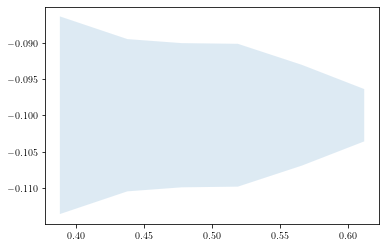

In [44]:

'''
Q = 2
def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,params):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
    #return Dz_err*CSVx_param(xbj,params)/Ax(Q,xbj)
CSVx_Dz_err_prop = CSVx_Dz_err(Q,Deltaz_all,Deltaz_err_prop_all,np.asarray(xbj_threes_plot),params)
#CSVx_Dz_err_prop = CSVx_Dz_err(Q,D_z_all[1],np.asarray(xbj_threes_corr),params);
plt.fill_between(xbj_threes_plot,-0.1-CSVx_Dz_err_prop,-0.1+CSVx_Dz_err_prop,alpha = 0.15)

#Deltaz_all, Deltacov_all = propagate(lambda p: Deltaz_param(zhad_fit, p), m_Q2.values, m_Q2.covariance)
#Deltaz_err_prop_all = np.diag(Deltacov_all)**0.5
#D_z_all = D_z_from_deltaz(Deltaz_all,Deltaz_err_prop_all)
#plt.plot(zhad_fit,D_z_all[0],lw = 3,label = r"$D(z)$")
#plt.fill_between(zhad_fit,D_z_all[0]-D_z_all[1],D_z_all[0]+D_z_all[1],alpha = 0.15)

def CSVx_Dz_err(Q,deltaz,deltaz_err,xbj,CSVx):
    Dz_err = (2*deltaz_err)/(1+deltaz)**2
    return Dz_err*CSVx/Ax(Q,xbj)
CSVx_Dz_errs = []
for i in range(0,len(xbj_threes_plot)):
    print(xbj_threes_plot[i])
    print(CSV_threes_plot[i])
    CSVx_Dz_err_i = (CSVx_Dz_err(math.sqrt(Q2s_threes_plot[i]),Deltaz_all[i],Deltaz_err_prop_all[i],xbj_threes_plot[i],CSV_threes_plot[i]))
    print(CSVx_Dz_err_i)
    CSVx_Dz_errs.append(abs(CSVx_Dz_err_i))
plt.fill_between(xbj_threes_plot,-0.1-np.asarray(CSVx_Dz_errs),-0.1+np.asarray(CSVx_Dz_errs),alpha = 0.15)



'''

CSVx_threes_Dz_errs = []
for i in range(0,len(xbj_threes_plot)):
    print(xbj_threes_plot[i])
    #print(CSV_threes_plot[i])
    CSVx_Dz_err_i = (CSVx_Dz_err(math.sqrt(Q2s_threes_plot[i]),Deltaz_all[i],Deltaz_err_prop_all[i],xbj_threes_plot[i],RD_threes_plot[i]))
    print(CSVx_Dz_err_i)
    CSVx_threes_Dz_errs.append(abs(CSVx_Dz_err_i))
plt.fill_between(xbj_threes_plot,-0.1-np.asarray(CSVx_threes_Dz_errs),-0.1+np.asarray(CSVx_threes_Dz_errs),alpha = 0.15)




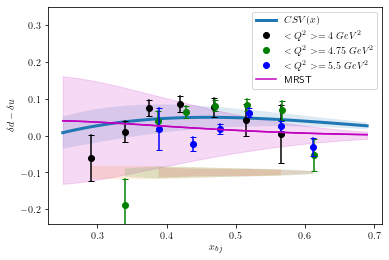

In [45]:
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")

plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

for i in range(len(CSV_ones_plot)):
    plt.plot([xbj_ones_plot[i],xbj_ones_plot[i]],[CSV_ones_plot[i]-CSV_ones_err_plot[i],CSV_ones_plot[i]+CSV_ones_err_plot[i]],marker = "_",color = "k")
plt.plot(xbj_ones_plot,CSV_ones_plot,"ko",label = r"$<Q^2> = 4\ GeV^2$")
for i in range(len(CSV_twos_plot)):
    plt.plot([xbj_twos_plot[i],xbj_twos_plot[i]],[CSV_twos_plot[i]-CSV_twos_err_plot[i],CSV_twos_plot[i]+CSV_twos_err_plot[i]],marker = "_",color = "g")
plt.plot(xbj_twos_plot,CSV_twos_plot,"go",label = r"$<Q^2> = 4.75\ GeV^2$")
for i in range(len(CSV_threes_plot)):
    plt.plot([xbj_threes_plot[i],xbj_threes_plot[i]],[CSV_threes_plot[i]-CSV_threes_err_plot[i],CSV_threes_plot[i]+CSV_threes_err_plot[i]],marker = "_",color = "b")
plt.plot(xbj_threes_plot,CSV_threes_plot,"bo",label = r"$<Q^2> = 5.5\ GeV^2$")




plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.35)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")



plt.fill_between(xbj_ones_plot,-0.1-np.asarray(CSVx_ones_Dz_errs),-0.1+np.asarray(CSVx_ones_Dz_errs),alpha = 0.15)
plt.fill_between(xbj_twos_plot,-0.1-np.asarray(CSVx_twos_Dz_errs),-0.1+np.asarray(CSVx_twos_Dz_errs),alpha = 0.15)
plt.fill_between(xbj_threes_plot,-0.1-np.asarray(CSVx_threes_Dz_errs),-0.1+np.asarray(CSVx_threes_Dz_errs),alpha = 0.15)


plt.savefig("results/CSV_err_7rhoall.pdf")



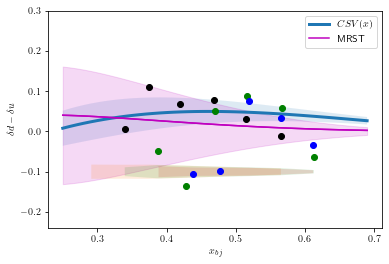

In [46]:
plt.plot(xbj_fit,CSVx_all,lw = 3,label = r"$CSV(x)$")

plt.fill_between(xbj_fit,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)



CSV_one_plot_2 = []
for i in range(0,len(xbj_ones_plot)):
    CSV_one_plot_2.append(CSVx(math.sqrt(4),z_ones_plot[i],xbj_ones_plot[i],RD_ones_plot[i]))
#CSV_one_err_plot_2 = CSVx_err(math.sqrt(4),zi_corr,xbji_corr,RD_ones)
CSV_two_plot_2 = []
for i in range(0,len(xbj_twos_plot)):
    CSV_two_plot_2.append(CSVx(math.sqrt(4),z_twos_plot[i],xbj_twos_plot[i],RD_twos_plot[i]))
CSV_three_plot_2 = []
for i in range(0,len(xbj_threes_plot)):
    CSV_three_plot_2.append(CSVx(math.sqrt(4),z_threes_plot[i],xbj_threes_plot[i],RD_threes_plot[i]))

plt.plot(xbj_ones_plot,CSV_one_plot_2,"ko")
plt.plot(xbj_twos_plot,CSV_two_plot_2,"go")
plt.plot(xbj_threes_plot,CSV_three_plot_2,"bo")


plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

plt.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'm',alpha = 0.15)
plt.legend()
plt.plot(x_axis,y_delta_dv-y_delta_uv,color = 'm',label = 'MRST')

#plt.xlim(0.25,0.7)
plt.ylim(-0.24,0.3)
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"$\delta d - \delta u$")



plt.fill_between(xbj_ones_plot,-0.1-np.asarray(CSVx_ones_Dz_errs),-0.1+np.asarray(CSVx_ones_Dz_errs),alpha = 0.15)
plt.fill_between(xbj_twos_plot,-0.1-np.asarray(CSVx_twos_Dz_errs),-0.1+np.asarray(CSVx_twos_Dz_errs),alpha = 0.15)
plt.fill_between(xbj_threes_plot,-0.1-np.asarray(CSVx_threes_Dz_errs),-0.1+np.asarray(CSVx_threes_Dz_errs),alpha = 0.15)






/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_94474/2271966579.py:7: RuntimeWarning: divide by zero encountered in power
  CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)


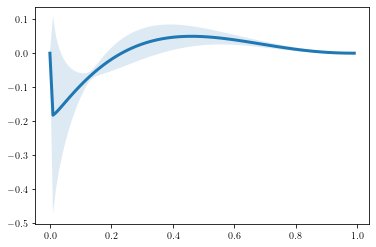

In [47]:
xbj_all = np.arange(0,1,0.01)
def CSVx_param(xbj,params):
    a = params[3]
    #a = -0.5
    b = params[2]
    c = sc.beta(a+2,b+1)/sc.beta(a+1,b+1)
    CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-c)
    #CSVx = params[3]*(1-xbj)**params[2]*xbj**(-0.5)*(xbj-c)
    #CSVx = (1-xbj)**4*xbj**params[3]*(xbj-params[2])
    #CSVx = (1-xbj)**params[2]*xbj**params[3]*(xbj-0.0909)
    #CSVx = (1-xbj)**params[2]*xbj**params[3]
    #CSVx = 2*params[len(params)-1]*(1-xbj)**4*xbj**-0.5*(xbj-0.0909)
    #CSVx = params[len(params)-1]
    return CSVx
CSVx_all, CSVcov_all = propagate(lambda p: CSVx_param(xbj_all, p), m_Q2.values, m_Q2.covariance)
plt.plot(xbj_all,CSVx_all,lw = 3,label = r"$CSV(x)$")
CSVx_err_prop_all = np.diag(CSVcov_all)**0.5
plt.fill_between(xbj_all,CSVx_all-CSVx_err_prop_all,CSVx_all+CSVx_err_prop_all,alpha = 0.15)

#plt.xlim(0.25,0.75)